In [1]:
import os
import json
import pickle
import sys
sys.path.insert(0, '../')
from src.DataSaver import DataSaver
from src.DynamicSystemAnalyzer import *
from src.PerformanceAnalyzer import *
from src.RNN_numpy import RNN_numpy
from src.utils import get_project_root, numpify, orthonormalize
from src.Trainer import Trainer
from src.RNN_torch import RNN_torch
from src.Task import *
from matplotlib import pyplot as plt
import torch
import time
from sklearn.decomposition import PCA
# from src.datajoint_config import *

In [2]:
disp = True
activation = "relu"
taskname = "ColorDiscrimination"
config_dict = json.load(open(os.path.join(get_project_root(), "data", "configs",
                                          'train_config_ColorDiscrimination_relu;N=50;lmbdr=0.5;lmbdo=0.3.json'), mode="r"))

In [3]:
# defining RNN:
N = config_dict["N"]
activation_name = config_dict["activation"]
if activation_name == 'relu':
    activation = lambda x: torch.maximum(x, torch.tensor(0))
elif activation_name == 'tanh':
    activation = torch.tanh
elif activation_name == 'sigmoid':
    activation = lambda x: 1/(1 + torch.exp(-x))
elif activation_name == 'softplus':
    activation = lambda x: torch.log(1 + torch.exp(5 * x))

dt = config_dict["dt"]
tau = config_dict["tau"]
constrained = config_dict["constrained"]
connectivity_density_rec = config_dict["connectivity_density_rec"]
spectral_rad = config_dict["sr"]
sigma_inp = config_dict["sigma_inp"]
sigma_rec = config_dict["sigma_rec"]
seed = config_dict["seed"]
rng = torch.Generator()
if not seed is None:
    rng.manual_seed(seed)
input_size = config_dict["num_inputs"]
output_size = config_dict["num_outputs"]

In [4]:
# Task:
n_steps = config_dict["n_steps"]
task_params = config_dict["task_params"]

In [5]:
# Trainer:
lambda_orth = config_dict["lambda_orth"]
lambda_r = config_dict["lambda_r"]
mask = np.array(config_dict["mask"])
max_iter = config_dict["max_iter"]
tol = config_dict["tol"]
lr = config_dict["lr"]
weight_decay = config_dict["weight_decay"]
same_batch = config_dict["same_batch"]

In [6]:
config_dict["constrained"] = True

In [7]:
# creating instances:
rnn_torch = RNN_torch(N=N, dt=dt, tau=tau, input_size=input_size, output_size=output_size,
                      activation=activation, constrained=constrained,
                      sigma_inp=sigma_inp, sigma_rec=sigma_rec,
                      connectivity_density_rec=connectivity_density_rec,
                      spectral_rad=spectral_rad,
                      random_generator=rng)
task = TaskColorDiscrimination(n_steps=n_steps, task_params=task_params)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(rnn_torch.parameters(),
                             lr=lr,
                             weight_decay=weight_decay)
trainer = Trainer(RNN=rnn_torch, Task=task,
                  max_iter=max_iter, tol=tol,
                  optimizer=optimizer, criterion=criterion,
                  lambda_orth=lambda_orth, lambda_r=lambda_r)
datasaver = None

Using cpu for RNN!


In [8]:
inputs, targets, conditions = task.get_batch()


In [9]:
inputs.shape

(3, 120, 360)

In [10]:
# generate only pure colors with rgb!
# lms to color mapping dataset

In [11]:
rnn_trained, train_losses, val_losses, net_params = trainer.run_training(train_mask=mask, same_batch=same_batch)

iteration 0, train loss: 0.99773, validation loss: 0.802859
iteration 1, train loss: 0.826625, validation loss: 0.801797
iteration 2, train loss: 0.809484, validation loss: 0.803406
iteration 3, train loss: 0.804446, validation loss: 0.80337
iteration 4, train loss: 0.802154, validation loss: 0.8021
iteration 5, train loss: 0.800585, validation loss: 0.80004
iteration 6, train loss: 0.798686, validation loss: 0.797411
iteration 7, train loss: 0.796346, validation loss: 0.794249
iteration 8, train loss: 0.793392, validation loss: 0.790517
iteration 9, train loss: 0.79014, validation loss: 0.786145
iteration 10, train loss: 0.785883, validation loss: 0.781059
iteration 11, train loss: 0.780941, validation loss: 0.775176
iteration 12, train loss: 0.775351, validation loss: 0.768412
iteration 13, train loss: 0.768506, validation loss: 0.760681
iteration 14, train loss: 0.761016, validation loss: 0.751894
iteration 15, train loss: 0.75212, validation loss: 0.741964
iteration 16, train loss:

iteration 104, train loss: 0.075269, validation loss: 0.072625
iteration 105, train loss: 0.075142, validation loss: 0.072554
iteration 106, train loss: 0.075147, validation loss: 0.072485
iteration 107, train loss: 0.075116, validation loss: 0.072417
iteration 108, train loss: 0.075017, validation loss: 0.072352
iteration 109, train loss: 0.07495, validation loss: 0.072289
iteration 110, train loss: 0.074924, validation loss: 0.072228
iteration 111, train loss: 0.074878, validation loss: 0.072169
iteration 112, train loss: 0.074709, validation loss: 0.072112
iteration 113, train loss: 0.074741, validation loss: 0.072057
iteration 114, train loss: 0.074644, validation loss: 0.072003
iteration 115, train loss: 0.074578, validation loss: 0.071952
iteration 116, train loss: 0.074576, validation loss: 0.071902
iteration 117, train loss: 0.074505, validation loss: 0.071854
iteration 118, train loss: 0.074431, validation loss: 0.071808
iteration 119, train loss: 0.074456, validation loss: 0.

iteration 213, train loss: 0.073369, validation loss: 0.070551
iteration 214, train loss: 0.07341, validation loss: 0.070544
iteration 215, train loss: 0.073377, validation loss: 0.070538
iteration 216, train loss: 0.073258, validation loss: 0.070531
iteration 217, train loss: 0.073452, validation loss: 0.070524
iteration 218, train loss: 0.073352, validation loss: 0.070518
iteration 219, train loss: 0.073328, validation loss: 0.070512
iteration 220, train loss: 0.073433, validation loss: 0.070506
iteration 221, train loss: 0.073335, validation loss: 0.070501
iteration 222, train loss: 0.073348, validation loss: 0.070495
iteration 223, train loss: 0.073173, validation loss: 0.07049
iteration 224, train loss: 0.073325, validation loss: 0.070484
iteration 225, train loss: 0.073327, validation loss: 0.070479
iteration 226, train loss: 0.073331, validation loss: 0.070473
iteration 227, train loss: 0.073299, validation loss: 0.070468
iteration 228, train loss: 0.073395, validation loss: 0.0

iteration 327, train loss: 0.073088, validation loss: 0.070115
iteration 328, train loss: 0.073136, validation loss: 0.070114
iteration 329, train loss: 0.073036, validation loss: 0.070112
iteration 330, train loss: 0.073276, validation loss: 0.070111
iteration 331, train loss: 0.073034, validation loss: 0.07011
iteration 332, train loss: 0.073147, validation loss: 0.070108
iteration 333, train loss: 0.072955, validation loss: 0.070106
iteration 334, train loss: 0.073202, validation loss: 0.070104
iteration 335, train loss: 0.073087, validation loss: 0.070102
iteration 336, train loss: 0.073066, validation loss: 0.070101
iteration 337, train loss: 0.073062, validation loss: 0.070099
iteration 338, train loss: 0.073042, validation loss: 0.070098
iteration 339, train loss: 0.073108, validation loss: 0.070097
iteration 340, train loss: 0.073036, validation loss: 0.070096
iteration 341, train loss: 0.072962, validation loss: 0.070094
iteration 342, train loss: 0.073026, validation loss: 0.

iteration 441, train loss: 0.07278, validation loss: 0.069677
iteration 442, train loss: 0.07281, validation loss: 0.069668
iteration 443, train loss: 0.072576, validation loss: 0.069657
iteration 444, train loss: 0.072725, validation loss: 0.069647
iteration 445, train loss: 0.07256, validation loss: 0.069636
iteration 446, train loss: 0.072597, validation loss: 0.069624
iteration 447, train loss: 0.072686, validation loss: 0.069613
iteration 448, train loss: 0.072605, validation loss: 0.0696
iteration 449, train loss: 0.072641, validation loss: 0.069588
iteration 450, train loss: 0.072694, validation loss: 0.069576
iteration 451, train loss: 0.072659, validation loss: 0.069563
iteration 452, train loss: 0.072549, validation loss: 0.06955
iteration 453, train loss: 0.072634, validation loss: 0.069537
iteration 454, train loss: 0.07262, validation loss: 0.069524
iteration 455, train loss: 0.072736, validation loss: 0.069512
iteration 456, train loss: 0.072559, validation loss: 0.069499

iteration 552, train loss: 0.070635, validation loss: 0.066873
iteration 553, train loss: 0.070804, validation loss: 0.066844
iteration 554, train loss: 0.070798, validation loss: 0.066814
iteration 555, train loss: 0.070766, validation loss: 0.06679
iteration 556, train loss: 0.070515, validation loss: 0.066752
iteration 557, train loss: 0.070528, validation loss: 0.066727
iteration 558, train loss: 0.070573, validation loss: 0.066701
iteration 559, train loss: 0.070573, validation loss: 0.066675
iteration 560, train loss: 0.070376, validation loss: 0.066647
iteration 561, train loss: 0.070615, validation loss: 0.066617
iteration 562, train loss: 0.070624, validation loss: 0.066586
iteration 563, train loss: 0.070481, validation loss: 0.06656
iteration 564, train loss: 0.070495, validation loss: 0.06654
iteration 565, train loss: 0.07039, validation loss: 0.06652
iteration 566, train loss: 0.070342, validation loss: 0.0665
iteration 567, train loss: 0.070681, validation loss: 0.066477

iteration 668, train loss: 0.069289, validation loss: 0.065287
iteration 669, train loss: 0.069204, validation loss: 0.065277
iteration 670, train loss: 0.06986, validation loss: 0.065259
iteration 671, train loss: 0.069623, validation loss: 0.065224
iteration 672, train loss: 0.069705, validation loss: 0.065203
iteration 673, train loss: 0.069485, validation loss: 0.065187
iteration 674, train loss: 0.069366, validation loss: 0.065173
iteration 675, train loss: 0.069146, validation loss: 0.06516
iteration 676, train loss: 0.069686, validation loss: 0.065149
iteration 677, train loss: 0.069828, validation loss: 0.065145
iteration 678, train loss: 0.069637, validation loss: 0.065152
iteration 679, train loss: 0.069643, validation loss: 0.065163
iteration 680, train loss: 0.069349, validation loss: 0.065177
iteration 681, train loss: 0.069483, validation loss: 0.065183
iteration 682, train loss: 0.069147, validation loss: 0.065168
iteration 683, train loss: 0.069407, validation loss: 0.0

iteration 785, train loss: 0.068722, validation loss: 0.063935
iteration 786, train loss: 0.068584, validation loss: 0.063926
iteration 787, train loss: 0.0682, validation loss: 0.063904
iteration 788, train loss: 0.068951, validation loss: 0.063893
iteration 789, train loss: 0.068476, validation loss: 0.063861
iteration 790, train loss: 0.068921, validation loss: 0.063828
iteration 791, train loss: 0.068913, validation loss: 0.063814
iteration 792, train loss: 0.068909, validation loss: 0.063807
iteration 793, train loss: 0.068716, validation loss: 0.063811
iteration 794, train loss: 0.068779, validation loss: 0.06383
iteration 795, train loss: 0.069103, validation loss: 0.063858
iteration 796, train loss: 0.068601, validation loss: 0.063853
iteration 797, train loss: 0.068423, validation loss: 0.063846
iteration 798, train loss: 0.068793, validation loss: 0.063834
iteration 799, train loss: 0.068633, validation loss: 0.063827
iteration 800, train loss: 0.068487, validation loss: 0.06

iteration 907, train loss: 0.068262, validation loss: 0.062827
iteration 908, train loss: 0.068313, validation loss: 0.062829
iteration 909, train loss: 0.068448, validation loss: 0.062842
iteration 910, train loss: 0.06809, validation loss: 0.062874
iteration 911, train loss: 0.067765, validation loss: 0.062882
iteration 912, train loss: 0.067925, validation loss: 0.062928
iteration 913, train loss: 0.067439, validation loss: 0.06294
iteration 914, train loss: 0.067924, validation loss: 0.062923
iteration 915, train loss: 0.06764, validation loss: 0.062872
iteration 916, train loss: 0.067654, validation loss: 0.062774
iteration 917, train loss: 0.068462, validation loss: 0.062726
iteration 918, train loss: 0.068009, validation loss: 0.062753
iteration 919, train loss: 0.068082, validation loss: 0.062794
iteration 920, train loss: 0.067715, validation loss: 0.062849
iteration 921, train loss: 0.068216, validation loss: 0.062944
iteration 922, train loss: 0.06795, validation loss: 0.062

iteration 1036, train loss: 0.067818, validation loss: 0.062683
iteration 1037, train loss: 0.067587, validation loss: 0.062599
iteration 1038, train loss: 0.068218, validation loss: 0.062643
iteration 1039, train loss: 0.06781, validation loss: 0.062712
iteration 1040, train loss: 0.068024, validation loss: 0.062848
iteration 1041, train loss: 0.067387, validation loss: 0.062987
iteration 1042, train loss: 0.067578, validation loss: 0.063015
iteration 1043, train loss: 0.067731, validation loss: 0.062988
iteration 1044, train loss: 0.067752, validation loss: 0.062894
iteration 1045, train loss: 0.067744, validation loss: 0.062751
iteration 1046, train loss: 0.067525, validation loss: 0.062603
iteration 1047, train loss: 0.067804, validation loss: 0.062563
iteration 1048, train loss: 0.06785, validation loss: 0.062554
iteration 1049, train loss: 0.067725, validation loss: 0.062615
iteration 1050, train loss: 0.067592, validation loss: 0.062768
iteration 1051, train loss: 0.067424, vali

iteration 1164, train loss: 0.067652, validation loss: 0.062575
iteration 1165, train loss: 0.067762, validation loss: 0.062629
iteration 1166, train loss: 0.067967, validation loss: 0.062732
iteration 1167, train loss: 0.067404, validation loss: 0.062814
iteration 1168, train loss: 0.06726, validation loss: 0.062831
iteration 1169, train loss: 0.067995, validation loss: 0.062779
iteration 1170, train loss: 0.067664, validation loss: 0.062723
iteration 1171, train loss: 0.067679, validation loss: 0.062599
iteration 1172, train loss: 0.06792, validation loss: 0.062548
iteration 1173, train loss: 0.067667, validation loss: 0.062543
iteration 1174, train loss: 0.067784, validation loss: 0.06259
iteration 1175, train loss: 0.067828, validation loss: 0.062677
iteration 1176, train loss: 0.067665, validation loss: 0.062753
iteration 1177, train loss: 0.067551, validation loss: 0.062719
iteration 1178, train loss: 0.067824, validation loss: 0.062727
iteration 1179, train loss: 0.067416, valid

iteration 1293, train loss: 0.067807, validation loss: 0.062844
iteration 1294, train loss: 0.06798, validation loss: 0.062914
iteration 1295, train loss: 0.067842, validation loss: 0.062885
iteration 1296, train loss: 0.067996, validation loss: 0.062789
iteration 1297, train loss: 0.067984, validation loss: 0.062686
iteration 1298, train loss: 0.067283, validation loss: 0.062588
iteration 1299, train loss: 0.067648, validation loss: 0.062559
iteration 1300, train loss: 0.067175, validation loss: 0.062533
iteration 1301, train loss: 0.067759, validation loss: 0.062559
iteration 1302, train loss: 0.067559, validation loss: 0.062631
iteration 1303, train loss: 0.067758, validation loss: 0.062691
iteration 1304, train loss: 0.067689, validation loss: 0.062684
iteration 1305, train loss: 0.067793, validation loss: 0.062618
iteration 1306, train loss: 0.067826, validation loss: 0.062597
iteration 1307, train loss: 0.067415, validation loss: 0.062558
iteration 1308, train loss: 0.067878, val

iteration 1422, train loss: 0.067838, validation loss: 0.062519
iteration 1423, train loss: 0.067727, validation loss: 0.0625
iteration 1424, train loss: 0.068123, validation loss: 0.062479
iteration 1425, train loss: 0.067788, validation loss: 0.062549
iteration 1426, train loss: 0.067421, validation loss: 0.062681
iteration 1427, train loss: 0.067563, validation loss: 0.062729
iteration 1428, train loss: 0.06742, validation loss: 0.06265
iteration 1429, train loss: 0.067899, validation loss: 0.062591
iteration 1430, train loss: 0.067872, validation loss: 0.062564
iteration 1431, train loss: 0.067576, validation loss: 0.06251
iteration 1432, train loss: 0.067734, validation loss: 0.062494
iteration 1433, train loss: 0.0676, validation loss: 0.062542
iteration 1434, train loss: 0.068103, validation loss: 0.062652
iteration 1435, train loss: 0.067139, validation loss: 0.062762
iteration 1436, train loss: 0.06781, validation loss: 0.062788
iteration 1437, train loss: 0.067675, validation

iteration 1551, train loss: 0.067953, validation loss: 0.0624
iteration 1552, train loss: 0.067502, validation loss: 0.062411
iteration 1553, train loss: 0.067746, validation loss: 0.062426
iteration 1554, train loss: 0.067859, validation loss: 0.062471
iteration 1555, train loss: 0.067567, validation loss: 0.062561
iteration 1556, train loss: 0.067731, validation loss: 0.062702
iteration 1557, train loss: 0.067682, validation loss: 0.06277
iteration 1558, train loss: 0.067549, validation loss: 0.062759
iteration 1559, train loss: 0.067816, validation loss: 0.062654
iteration 1560, train loss: 0.067849, validation loss: 0.062585
iteration 1561, train loss: 0.067352, validation loss: 0.062519
iteration 1562, train loss: 0.067664, validation loss: 0.062549
iteration 1563, train loss: 0.067665, validation loss: 0.062569
iteration 1564, train loss: 0.06763, validation loss: 0.062593
iteration 1565, train loss: 0.067578, validation loss: 0.062611
iteration 1566, train loss: 0.067589, valida

iteration 1680, train loss: 0.067371, validation loss: 0.062426
iteration 1681, train loss: 0.067735, validation loss: 0.062374
iteration 1682, train loss: 0.067457, validation loss: 0.062379
iteration 1683, train loss: 0.067271, validation loss: 0.062409
iteration 1684, train loss: 0.067743, validation loss: 0.062516
iteration 1685, train loss: 0.067841, validation loss: 0.062659
iteration 1686, train loss: 0.067359, validation loss: 0.062738
iteration 1687, train loss: 0.067765, validation loss: 0.062674
iteration 1688, train loss: 0.067463, validation loss: 0.062492
iteration 1689, train loss: 0.067442, validation loss: 0.062386
iteration 1690, train loss: 0.067744, validation loss: 0.062379
iteration 1691, train loss: 0.067862, validation loss: 0.062407
iteration 1692, train loss: 0.067701, validation loss: 0.062436
iteration 1693, train loss: 0.067511, validation loss: 0.062538
iteration 1694, train loss: 0.067585, validation loss: 0.062621
iteration 1695, train loss: 0.067586, va

iteration 1808, train loss: 0.067082, validation loss: 0.062299
iteration 1809, train loss: 0.067622, validation loss: 0.062316
iteration 1810, train loss: 0.067637, validation loss: 0.062333
iteration 1811, train loss: 0.067385, validation loss: 0.06233
iteration 1812, train loss: 0.067743, validation loss: 0.062322
iteration 1813, train loss: 0.067561, validation loss: 0.062302
iteration 1814, train loss: 0.067505, validation loss: 0.062301
iteration 1815, train loss: 0.067707, validation loss: 0.062324
iteration 1816, train loss: 0.067534, validation loss: 0.062346
iteration 1817, train loss: 0.067824, validation loss: 0.06239
iteration 1818, train loss: 0.067411, validation loss: 0.062422
iteration 1819, train loss: 0.067773, validation loss: 0.062394
iteration 1820, train loss: 0.067539, validation loss: 0.062333
iteration 1821, train loss: 0.067428, validation loss: 0.062253
iteration 1822, train loss: 0.067683, validation loss: 0.062222
iteration 1823, train loss: 0.067754, vali

iteration 1936, train loss: 0.06724, validation loss: 0.062512
iteration 1937, train loss: 0.067366, validation loss: 0.062462
iteration 1938, train loss: 0.067296, validation loss: 0.062327
iteration 1939, train loss: 0.067811, validation loss: 0.062222
iteration 1940, train loss: 0.067594, validation loss: 0.062151
iteration 1941, train loss: 0.067141, validation loss: 0.062107
iteration 1942, train loss: 0.067055, validation loss: 0.062157
iteration 1943, train loss: 0.067525, validation loss: 0.062291
iteration 1944, train loss: 0.067447, validation loss: 0.062425
iteration 1945, train loss: 0.067666, validation loss: 0.062451
iteration 1946, train loss: 0.067206, validation loss: 0.062314
iteration 1947, train loss: 0.067481, validation loss: 0.062152
iteration 1948, train loss: 0.067275, validation loss: 0.062066
iteration 1949, train loss: 0.067532, validation loss: 0.062039
iteration 1950, train loss: 0.067099, validation loss: 0.062106
iteration 1951, train loss: 0.067597, val

iteration 2062, train loss: 0.067325, validation loss: 0.061842
iteration 2063, train loss: 0.066921, validation loss: 0.061888
iteration 2064, train loss: 0.067113, validation loss: 0.061862
iteration 2065, train loss: 0.066858, validation loss: 0.061817
iteration 2066, train loss: 0.066806, validation loss: 0.061722
iteration 2067, train loss: 0.066903, validation loss: 0.06166
iteration 2068, train loss: 0.067001, validation loss: 0.061635
iteration 2069, train loss: 0.067002, validation loss: 0.061623
iteration 2070, train loss: 0.067246, validation loss: 0.061626
iteration 2071, train loss: 0.067139, validation loss: 0.061636
iteration 2072, train loss: 0.066849, validation loss: 0.061624
iteration 2073, train loss: 0.0667, validation loss: 0.061641
iteration 2074, train loss: 0.066754, validation loss: 0.061622
iteration 2075, train loss: 0.066965, validation loss: 0.061646
iteration 2076, train loss: 0.066917, validation loss: 0.06161
iteration 2077, train loss: 0.067013, valida

iteration 2184, train loss: 0.066914, validation loss: 0.060539
iteration 2185, train loss: 0.06637, validation loss: 0.060508
iteration 2186, train loss: 0.065916, validation loss: 0.060527
iteration 2187, train loss: 0.066164, validation loss: 0.060567
iteration 2188, train loss: 0.066509, validation loss: 0.060514
iteration 2189, train loss: 0.065957, validation loss: 0.060499
iteration 2190, train loss: 0.066154, validation loss: 0.060503
iteration 2191, train loss: 0.06609, validation loss: 0.060508
iteration 2192, train loss: 0.066121, validation loss: 0.060459
iteration 2193, train loss: 0.066224, validation loss: 0.060396
iteration 2194, train loss: 0.066025, validation loss: 0.060393
iteration 2195, train loss: 0.066594, validation loss: 0.060386
iteration 2196, train loss: 0.06665, validation loss: 0.060361
iteration 2197, train loss: 0.066938, validation loss: 0.060432
iteration 2198, train loss: 0.066329, validation loss: 0.060523
iteration 2199, train loss: 0.066297, valid

iteration 2310, train loss: 0.065856, validation loss: 0.060121
iteration 2311, train loss: 0.06598, validation loss: 0.060099
iteration 2312, train loss: 0.066278, validation loss: 0.060098
iteration 2313, train loss: 0.066177, validation loss: 0.06012
iteration 2314, train loss: 0.065977, validation loss: 0.060191
iteration 2315, train loss: 0.066121, validation loss: 0.060185
iteration 2316, train loss: 0.06581, validation loss: 0.060122
iteration 2317, train loss: 0.065914, validation loss: 0.060068
iteration 2318, train loss: 0.065956, validation loss: 0.06004
iteration 2319, train loss: 0.065749, validation loss: 0.06
iteration 2320, train loss: 0.065634, validation loss: 0.060053
iteration 2321, train loss: 0.06592, validation loss: 0.060124
iteration 2322, train loss: 0.065879, validation loss: 0.060092
iteration 2323, train loss: 0.065835, validation loss: 0.059951
iteration 2324, train loss: 0.066237, validation loss: 0.05989
iteration 2325, train loss: 0.066032, validation l

iteration 2437, train loss: 0.065728, validation loss: 0.059947
iteration 2438, train loss: 0.065307, validation loss: 0.059966
iteration 2439, train loss: 0.065936, validation loss: 0.059964
iteration 2440, train loss: 0.065589, validation loss: 0.059978
iteration 2441, train loss: 0.065651, validation loss: 0.059943
iteration 2442, train loss: 0.065114, validation loss: 0.059908
iteration 2443, train loss: 0.065783, validation loss: 0.05987
iteration 2444, train loss: 0.065974, validation loss: 0.059841
iteration 2445, train loss: 0.066108, validation loss: 0.059819
iteration 2446, train loss: 0.066201, validation loss: 0.059802
iteration 2447, train loss: 0.065622, validation loss: 0.059822
iteration 2448, train loss: 0.066213, validation loss: 0.059873
iteration 2449, train loss: 0.066151, validation loss: 0.059969
iteration 2450, train loss: 0.065894, validation loss: 0.060004
iteration 2451, train loss: 0.065962, validation loss: 0.059996
iteration 2452, train loss: 0.066341, val

iteration 2565, train loss: 0.066035, validation loss: 0.059861
iteration 2566, train loss: 0.066401, validation loss: 0.059823
iteration 2567, train loss: 0.065813, validation loss: 0.059773
iteration 2568, train loss: 0.066091, validation loss: 0.05975
iteration 2569, train loss: 0.066004, validation loss: 0.059735
iteration 2570, train loss: 0.065749, validation loss: 0.059709
iteration 2571, train loss: 0.065716, validation loss: 0.059792
iteration 2572, train loss: 0.065608, validation loss: 0.059904
iteration 2573, train loss: 0.065414, validation loss: 0.059842
iteration 2574, train loss: 0.065259, validation loss: 0.059731
iteration 2575, train loss: 0.065216, validation loss: 0.05969
iteration 2576, train loss: 0.065425, validation loss: 0.059684
iteration 2577, train loss: 0.065799, validation loss: 0.059673
iteration 2578, train loss: 0.065324, validation loss: 0.059684
iteration 2579, train loss: 0.065708, validation loss: 0.059707
iteration 2580, train loss: 0.065423, vali

iteration 2692, train loss: 0.064993, validation loss: 0.059501
iteration 2693, train loss: 0.065683, validation loss: 0.059496
iteration 2694, train loss: 0.065618, validation loss: 0.059509
iteration 2695, train loss: 0.066031, validation loss: 0.05959
iteration 2696, train loss: 0.06569, validation loss: 0.05958
iteration 2697, train loss: 0.06592, validation loss: 0.059567
iteration 2698, train loss: 0.065913, validation loss: 0.059567
iteration 2699, train loss: 0.065396, validation loss: 0.059534
iteration 2700, train loss: 0.065923, validation loss: 0.059551
iteration 2701, train loss: 0.065613, validation loss: 0.059607
iteration 2702, train loss: 0.065342, validation loss: 0.059729
iteration 2703, train loss: 0.065255, validation loss: 0.059717
iteration 2704, train loss: 0.066038, validation loss: 0.059556
iteration 2705, train loss: 0.066112, validation loss: 0.059549
iteration 2706, train loss: 0.065399, validation loss: 0.059558
iteration 2707, train loss: 0.06582, validat

iteration 2820, train loss: 0.065725, validation loss: 0.059645
iteration 2821, train loss: 0.065601, validation loss: 0.059669
iteration 2822, train loss: 0.065277, validation loss: 0.059701
iteration 2823, train loss: 0.065603, validation loss: 0.059706
iteration 2824, train loss: 0.065463, validation loss: 0.059682
iteration 2825, train loss: 0.065314, validation loss: 0.059621
iteration 2826, train loss: 0.065605, validation loss: 0.05957
iteration 2827, train loss: 0.065768, validation loss: 0.05954
iteration 2828, train loss: 0.065702, validation loss: 0.059513
iteration 2829, train loss: 0.065705, validation loss: 0.059516
iteration 2830, train loss: 0.065773, validation loss: 0.059553
iteration 2831, train loss: 0.065338, validation loss: 0.059555
iteration 2832, train loss: 0.065697, validation loss: 0.059498
iteration 2833, train loss: 0.06545, validation loss: 0.059508
iteration 2834, train loss: 0.06577, validation loss: 0.059521
iteration 2835, train loss: 0.06585, validat

iteration 2949, train loss: 0.065385, validation loss: 0.059368
iteration 2950, train loss: 0.065302, validation loss: 0.059336
iteration 2951, train loss: 0.065634, validation loss: 0.059299
iteration 2952, train loss: 0.066098, validation loss: 0.059265
iteration 2953, train loss: 0.065279, validation loss: 0.059282
iteration 2954, train loss: 0.066162, validation loss: 0.059279
iteration 2955, train loss: 0.065193, validation loss: 0.059298
iteration 2956, train loss: 0.065272, validation loss: 0.059297
iteration 2957, train loss: 0.065351, validation loss: 0.059288
iteration 2958, train loss: 0.065405, validation loss: 0.059282
iteration 2959, train loss: 0.066084, validation loss: 0.059306
iteration 2960, train loss: 0.065361, validation loss: 0.059338
iteration 2961, train loss: 0.065578, validation loss: 0.059366
iteration 2962, train loss: 0.065521, validation loss: 0.059357
iteration 2963, train loss: 0.06589, validation loss: 0.059345
iteration 2964, train loss: 0.065317, val

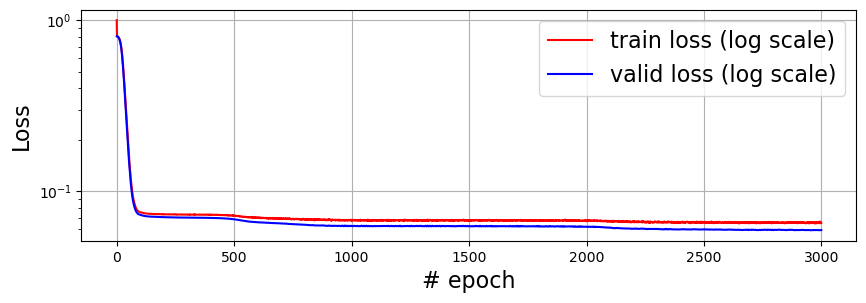

In [22]:
fig_trainloss = plt.figure(figsize=(10, 3))
plt.plot(train_losses, color='r', label='train loss (log scale)')
plt.plot(val_losses, color='b', label='valid loss (log scale)')
plt.yscale("log")
plt.grid(True)
plt.xlabel("# epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.legend(fontsize=16)
if disp:
    plt.show()
if not (datasaver is None): datasaver.save_figure(fig_trainloss, "train&valid_loss")

In [23]:
# validate
RNN_valid = RNN_numpy(N=net_params["N"],
                      dt=net_params["dt"],
                      tau=net_params["tau"],
                      activation=numpify(activation),
                      W_inp=net_params["W_inp"],
                      W_rec=net_params["W_rec"],
                      W_out=net_params["W_out"],
                      bias_rec=net_params["bias_rec"],
                      y_init=net_params["y_init"])

In [24]:
analyzer = PerformanceAnalyzer(RNN_valid)
score_function = lambda x, y: np.mean((x - y) ** 2)
input_batch_valid, target_batch_valid, conditions_valid = task.get_batch()
score = analyzer.get_validation_score(score_function, input_batch_valid, target_batch_valid,
                                      mask, sigma_rec=sigma_rec, sigma_inp=sigma_inp)

In [25]:
print(f"MSE validation: {np.round(score, 5)}")

MSE validation: 0.07589


In [26]:
print(f"Plotting random trials")
inds = np.random.choice(np.arange(input_batch_valid.shape[-1]), 5)
inputs = input_batch_valid[..., inds]
targets = target_batch_valid[..., inds]

Plotting random trials


In [27]:
inputs.shape

(3, 120, 5)

In [28]:
RNN_valid.clear_history()
RNN_valid.run(input_timeseries=input_batch_valid)

In [29]:
input_batch_valid.shape

(3, 120, 360)

In [30]:
output = RNN_valid.get_output()

In [31]:
output.shape

(12, 120, 360)

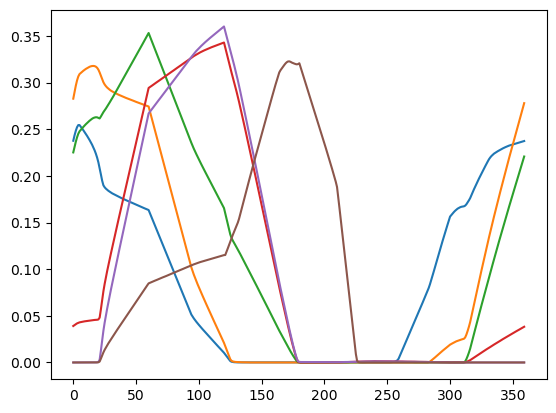

In [32]:
plt.plot(np.round(output[:6, -1, :].T, 4))